In [1]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()

if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/GARA.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14)
#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond Premier Pro'

/Library/Fonts/GaramondPremrPro.otf


In [137]:
# Chargement des données DECATHLON et afficher la liste des disciplines
df_decathlon = pd.read_csv("input/decathlon/decathlon.csv",header=0,sep=";", low_memory=False)
#print("Liste des colonnes\n\n", df_decathlon.columns)

# Verif données
#print(df_decathlon.head(5))
#print("Shape des données DECATHLON: ", df_decathlon.shape)

#print(df_decathlon.groupby("Competition").count())
df_decathlon.loc[df_decathlon["Competition"]=="OlympicG", "Competition"]=1
df_decathlon.loc[df_decathlon["Competition"]=="Decastar", "Competition"]=2
df_decathlon.rename(columns={"Unnamed: 0":"Users"},inplace=True)
df_decathlon_num = df_decathlon.set_index("Users")
#print(df_decathlon_num)

In [136]:
# Centrer et Réduire les données
# Première méthode avec scale
from sklearn.preprocessing import scale
df_decathlon_cr = scale(df_decathlon_num)
#print(df_decathlon_cr)

PCA()


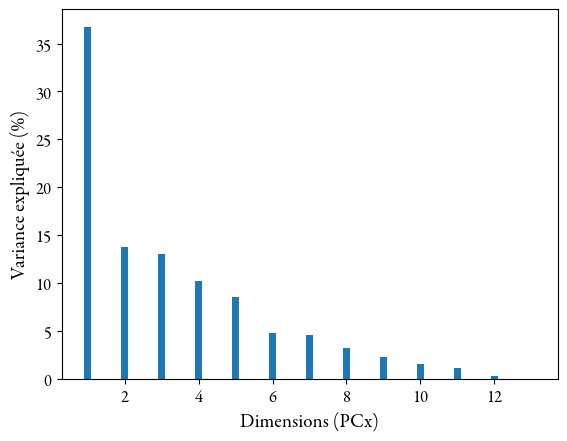

In [138]:
# ACP des données DECATHLON. Affichage des variances expliquées pour choisir le # de composantes
pca=PCA()
pca = pca.fit(df_decathlon_cr)
print(pca) # 
# Affichage des variances expliquées
fig,ax = plt.subplots()
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    100*pca.explained_variance_ratio_,
    width=0.2
    )
plt.xlabel("Dimensions (PCx)", fontsize=14)
plt.ylabel("Variance expliquée (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

A  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
B  [3.67401983e-01 1.37354243e-01 1.30535886e-01 1.01704640e-01
 8.55874974e-02 4.73609836e-02 4.54389377e-02 3.18571149e-02
 2.26471513e-02 1.54597582e-02 1.16250350e-02 3.02265356e-03
 4.11652990e-06]


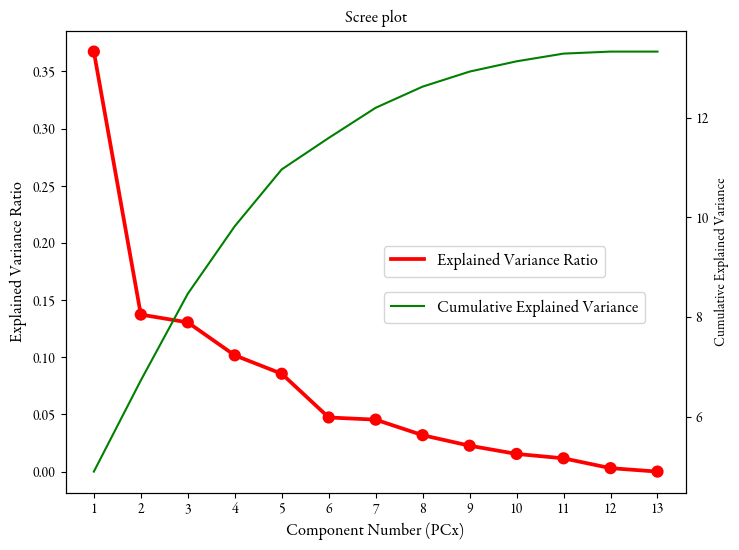

In [85]:
# Do a scree plot (ax1)
n_components=13
label=["Explained Variance Ratio"]
indice = np.arange(1, n_components+1)
print("A ",indice)
print("B ",pca.explained_variance_ratio_)
(fig, ax1) = plt.subplots(figsize=(8, 6))
ax1 = sns.pointplot(x=indice, y=pca.explained_variance_ratio_,color="red")
#ax1.set_xticklabels([1,2,3,4],fontsize=12)
ax1.set_xlabel('Component Number (PCx)',fontsize=12)
ax1.set_title('Scree plot',fontsize=12)
ax1.set_ylabel("Explained Variance Ratio",fontsize=12)
ax1.legend(label,loc="center left", bbox_to_anchor=(0.5,0.5),prop={
               'family': 'Garamond Premier Pro', "size": 12, 'stretch': 'normal'})
# Ligne cumulée (ax2)
ax2=ax1.twinx()
array_ev = pca.explained_variance_.cumsum()
sry = pd.Series(array_ev)
#color = 'tab:red'
ax2 = sns.lineplot(sry,ax=ax2,color="green")
ax2.set_ylabel('Cumulative Explained Variance')
label=["Cumulative Explained Variance"]
#ax2.set_label(labels)

ax2.legend(label,loc="center left",bbox_to_anchor=(0.5,0.4), prop={
               'family': 'Garamond Premier Pro', "size": 12, 'stretch': 'normal'})
ax2.legend

plt.show()

# On choisit 4 composantes principales pour avoir 74% de la variance expliquée

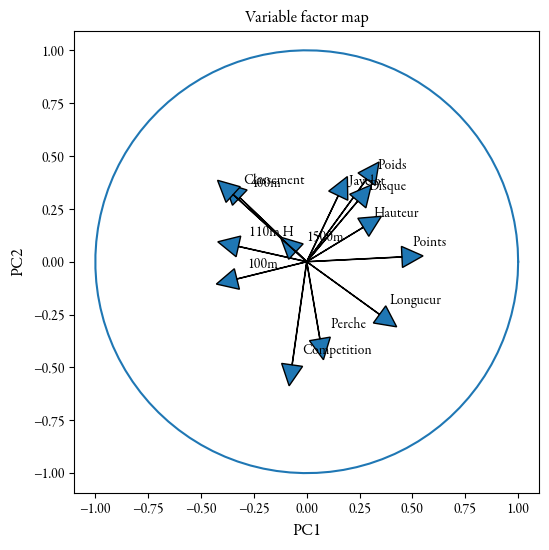

[-0.33044456  0.34435995  0.28314069  0.26760128 -0.3167147  -0.3231401
  0.24152281  0.06219665  0.14907721 -0.05114497 -0.34799973  0.45031604
 -0.06918042]


In [142]:
# Affichage cercle de corrélation n_components=2

# Nombre de composants
n_components=2

# Modèle PCA
pca_decathlon = PCA(n_components=n_components)

# Liste des features d'origine
liste_features_origine = df_decathlon_num.columns.to_list()

# Nb de features d'origine
nb_features_origine = len(liste_features_origine)

# Liste des noms des composants principaux
liste_noms_PC = [f'PC{i}' for i in list(range(1, n_components + 1))]

# Fit_Transform les données
reduced_features = pca_decathlon.fit_transform(df_decathlon_cr)

# Affichage des loadings (components_)
loadings = pca_decathlon.components_ # Eigenvectors

# Match PC names to loadings
pc_loadings={}
for i in range(len(liste_noms_PC)):
    pc_loadings[liste_noms_PC[i]]= loadings[i]

df_loadings = pd.DataFrame.from_dict(pc_loadings) # Ajout des noms de colonnes

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(6,6))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df_decathlon_num.columns.values[i]
             )
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
ax.set_xlabel('PC1',fontsize=12)
ax.set_ylabel('PC2',fontsize=12)
plt.show()
print(pca.components_[0])

In [ ]:
# Cercle de corrélation avec 2 composantes principales



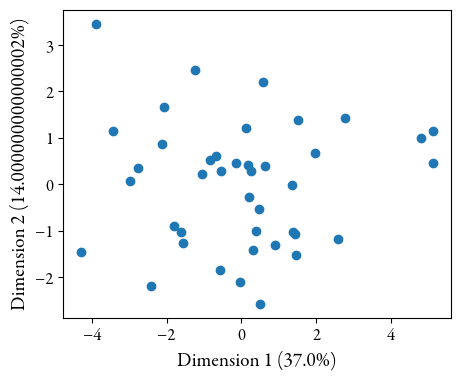

In [36]:
# PCA

pca=PCA(n_components=5)
components = pca.fit_transform(df_decathlon_cr)
df_pca_data_cr = pd.DataFrame(data=components)
df_pca_data_cr_noms = df_pca_data_cr.copy()
df_pca_data_cr_noms.reset_index
df_pca_data_cr_noms["Users"] = df_decathlon["Users"]
df_pca_data_cr_noms.rename(columns={0:"PC1",1:"PC2"}, inplace=True)

# Affichage des données avec 4 composantes principales
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()

sctt=ax.scatter(x=df_pca_data_cr_noms["PC1"],y=df_pca_data_cr_noms["PC2"]) #c=df_pca_data_cr_noms["iris_class"].map(colors)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Dimension 1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", fontsize=14)
plt.ylabel("Dimension 2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", fontsize=14)
plt.show()



PCA(n_components=4)
ERROR! Session/line number was not unique in database. History logging moved to new session 79
